# Brian Matilla- MPO 624- HW3 Fourier Analysis

### Work in a pylab session: clean, basic tools

In [1]:
# This magic line loads numpy, scipy, matplotlib. 
# add the word inline to put figures inline
import matplotlib.pyplot as plt
import netCDF4
import pandas as pd

%pylab inline

# xkcd style?
#plt.xkcd();

Populating the interactive namespace from numpy and matplotlib


## Importing our dataset.

In [2]:
#Import data

from netCDF4 import Dataset

dataset = netCDF4.Dataset('/Users/Brian/Documents/Miami_Research/Datasets/allVars_r180x90_6.nc4', 'r')

print(dataset);


<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.6.4 (http://code.zmaw.de/projects/cdi)
    Conventions: CF-1.4
    CDO: Climate Data Operators version 1.6.4 (http://code.zmaw.de/projects/cdo)
    NCO: 4.3.7
    nco_openmp_thread_number: 1
    history: Fri Dec  4 13:10:58 2015: ncrename -v SKEDOT_ZON,ZSKEDOT allVars_r180x90_6.nc4
Fri Dec  4 13:10:21 2015: ncrename -v TEF,TEEF allVars_r180x90_6.nc4
Fri Dec  4 13:09:23 2015: ncatted -a long_name,SKEDOT_ZON,o,c,zonal shear kinetic energy allVars_r180x90_6.nc4
Wed Oct 28 15:20:51 2015: ncks -x -v KEDOT allVars_r180x90_1.nc4 allVars_r180x90_1_noKEDOT.nc4
Wed Oct 28 15:16:12 2015: ncatted -a units,SKEDOT_ZON,o,c,m2 s-3 /home/niznik/niznik-data2/shared_repository/allVars_r180x90_1.nc4
Wed Oct 28 15:16:12 2015: ncatted -a long_name,SKEDOT_ZON,o,c,eddy vertical momentum flux /home/niznik/niznik-data2/shared_repository/allVars_r180x90_1.nc4
Wed Oct 28 15:13:39 2015: nc

### For simplicity, we will be using coordinates for NCAR in Boulder, Colorado 

[  6.00000000e+01   4.20000000e+02   7.80000000e+02 ...,   1.09482000e+06
   1.09518000e+06   1.09554000e+06]
Dimension = (3044,)
Minimum = 60.0 minutes since 2005-05-16 00:30:00 or May-2005
Maximum = 1095540.0 minutes since 2005-05-16 00:30:00 or June-2007


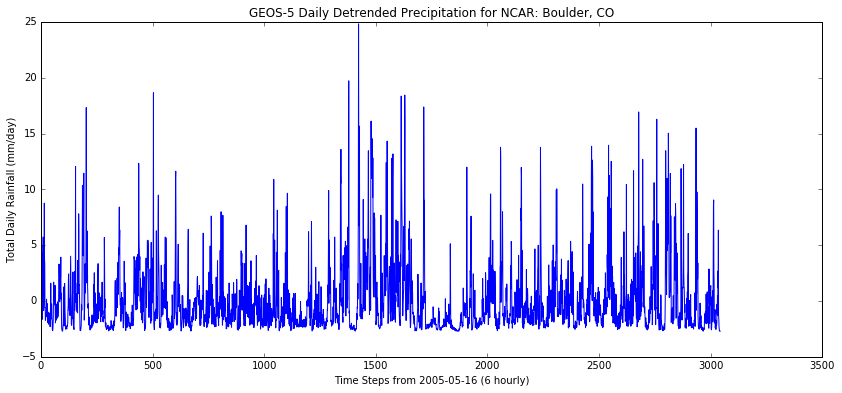

In [3]:
#Define our coordinates for the "real-world research" case study.

lats= dataset.variables['lat'][:]
lons= dataset.variables['lon'][:]
times= dataset.variables['time'][:]

#Define our coordinates for a specific lat/lon. Useful for a case study!
Precip= dataset.variables['PREC'][:,40.05,-105.15] # :- Load ALL times, input lat, input lon(-180,180)

Precip_mod= 21600*Precip #Recall that this is 6 hourly data, or 4 6-hourly blocks, i.e. 86400/4= 21600 seconds

#KEnergy= dataset.variables['ZSKEDOT'][:,40.05,-105.15]
#UWind= dataset.variables['U'][:,-21,-125]

times = dataset.variables['time'][:]                            # Conventional "continous" time axis
date = netCDF4.num2date(times,'minutes since 2005-05-16 00:30:00')   # Python date system

print(times)
print "Dimension = "+ np.str(times.shape)
print "Minimum = "+ np.str(times.min())+" minutes since 2005-05-16 00:30:00 or "+ date[0].strftime('%B-%Y')
print "Maximum = "+ np.str(times.max())+" minutes since 2005-05-16 00:30:00 or "+ date[-1].strftime('%B-%Y')

figure(1, figsize=(14, 6))

#plt.plot(Precip_mod)
plt.show

Precip_detrend = detrend(Precip_mod) # this subtracts the mean daily precipitation

plt.plot(Precip_detrend)

title('GEOS-5 Daily Detrended Precipitation for NCAR: Boulder, CO'), xlabel('Time Steps from 2005-05-16 (6 hourly)')

ylabel('Total Daily Rainfall (mm/day)')

## Plot the series, two copies (Should be the same)

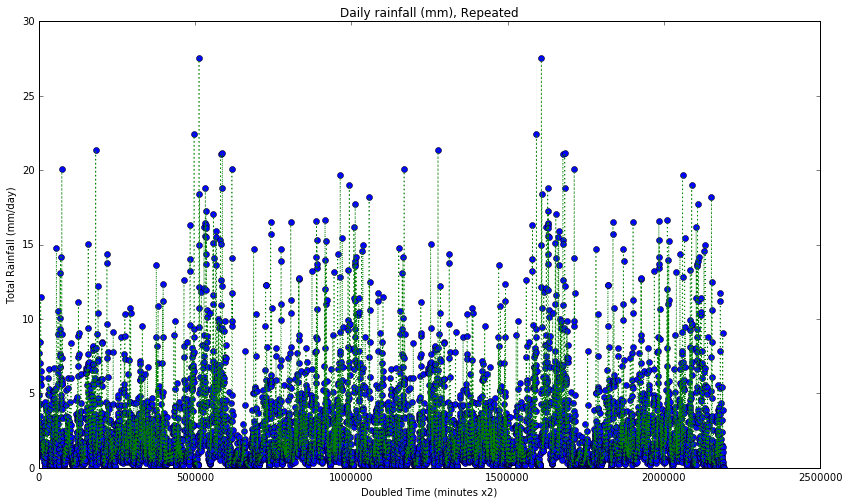

In [4]:
# Plot it, repeated since Fourier analysis assumes that
xx = concatenate((times, times+max(times)))
yy = concatenate((Precip_mod, Precip_mod       ))

# Plot the discrete values as dots '.', 
# connected by a dotted line ':'
figure(2, figsize=(14, 8))
plot(xx,yy,'o', label='raw')
plot(xx,yy,':', label='raw')
title('Daily rainfall (mm), Repeated');

xlabel('Doubled Time (minutes x2)');
ylabel('Total Rainfall (mm/day)');

## SFT = Slow Fourier Transform (illustration)

(<matplotlib.text.Text at 0x11c9efa50>, <matplotlib.text.Text at 0x11c9d2890>)

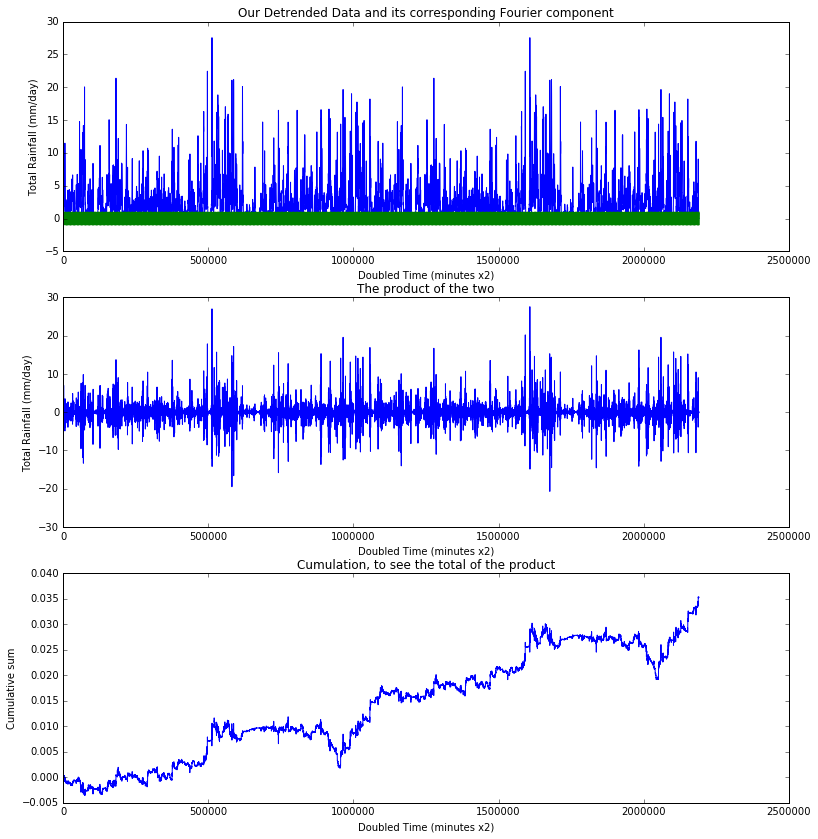

In [5]:
# Slow Fourier transform: mean of product of sin() and data
figure(3, figsize=(13, 14))

subplot(311)
plot(xx,yy)
title('Our Detrended Data and its corresponding Fourier component')
plot(xx, sin(6*xx))

xlabel('Doubled Time (minutes x2)'), ylabel('Total Rainfall (mm/day)')

subplot(312)
product = yy * sin(5*xx)
plot(xx, product)
title('The product of the two')

xlabel('Doubled Time (minutes x2)'), ylabel('Total Rainfall (mm/day)')

subplot(313)
plot(xx, cumsum(product)/len(product))
title('Cumulation, to see the total of the product');

xlabel('Doubled Time (minutes x2)'), ylabel('Cumulative sum')

## Make the complex spectrum, using fft
...normalizing by input series length, since it makes no sense for the *values* of the spectrum in the plots to depend on sampling rate (and thus on N)

In [6]:
N = len(Precip_detrend) 
spec = fft.fft(Precip_detrend) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

## Plot real and imaginary parts
Should be symmetric since the input is real. 
But the mean of the data is in wavenumber 0 of the real (cosine) part.

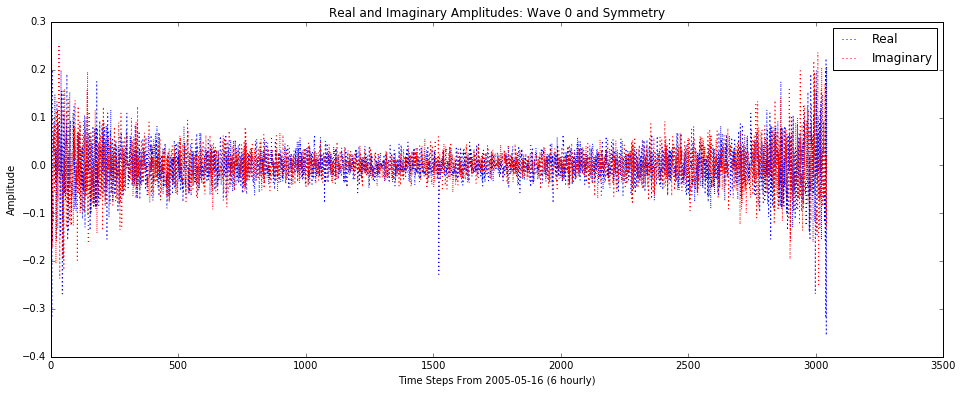

In [7]:
# Plot the real (blue) and imaginary (red) parts
figure(4, figsize=(16, 6))

#plot(specr,'bo', label='real')
plot(specr,'b:', label='Real') # lines connecting DISCRETE points 
#plot(speci,'ro', label='imag')
plot(speci,'r:', label='Imaginary') # lines are meaningless; for clarity
title('Real and Imaginary Amplitudes: Wave 0 and Symmetry')
legend(loc='best');

xlabel('Time Steps From 2005-05-16 (6 hourly)')
ylabel('Amplitude')

### Plot amplitude or *power* (amplitude squared) and phase
Should be symmetric since the input is real. 
But the mean of the data is in wavenumber 0 of the real (cosine) part.

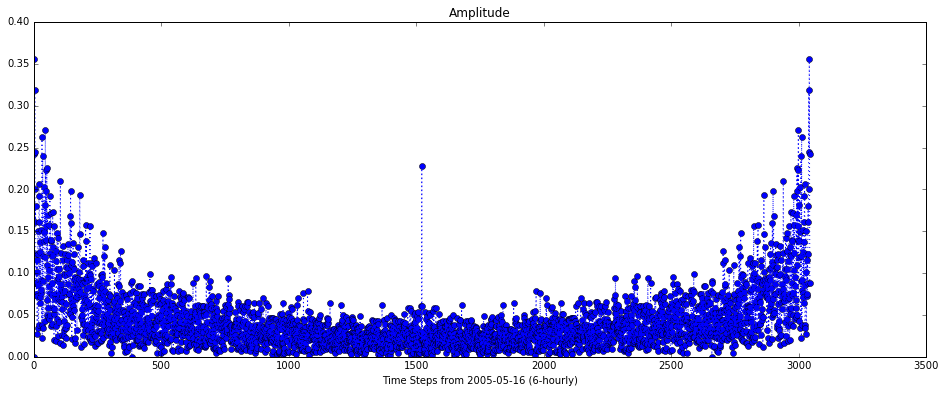

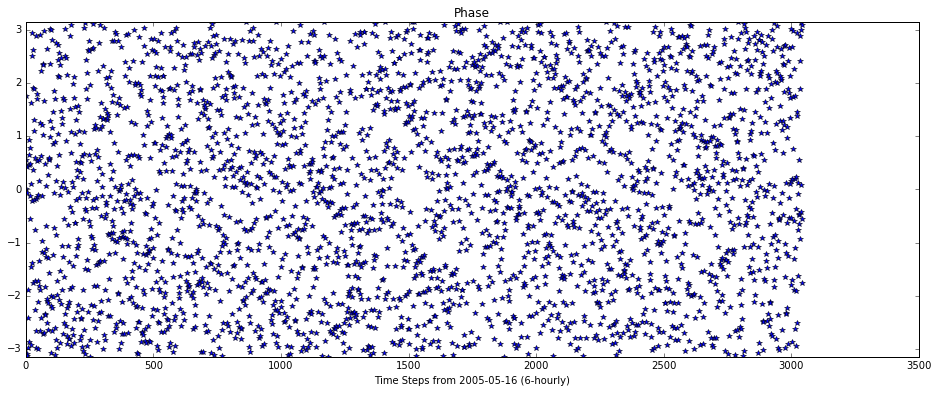

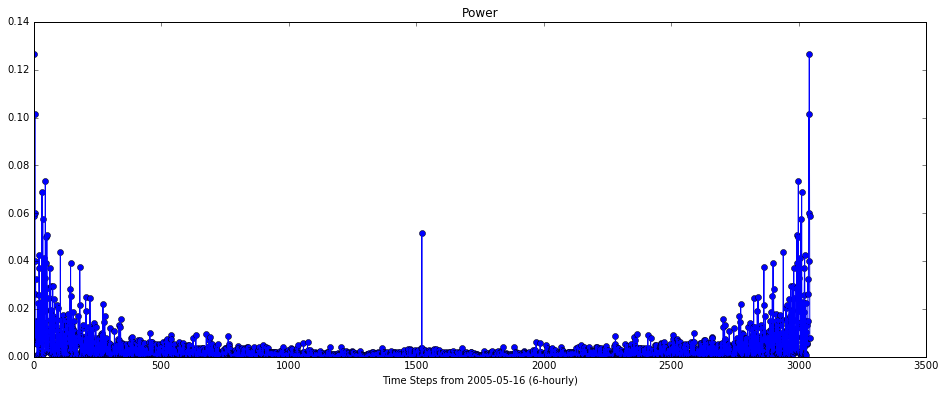

In [8]:
# Plot the amplitude and phase
figure(5, figsize=(16, 6))

plot(ampli,'bo'); 
plot(ampli,'b:'); 
title('Amplitude')
xlabel('Time Steps from 2005-05-16 (6-hourly)');

figure(6, figsize=(16, 6))

plot(phase   ,'b*')
title('Phase')
xlabel('Time Steps from 2005-05-16 (6-hourly)');
ylim([-pi,pi]);

figure(7, figsize=(16, 6))

plot(ampli*ampli,'bo');
plot(ampli*ampli,'b');
title('Power')
xlabel('Time Steps from 2005-05-16 (6-hourly)');


### Tidy up the symmetry and labels for a nicer Power spectrum plot

In [9]:
# TAKE JUST THE LEFT HALF OF THE SYMMETRIC SPECTRUM
Wavenumbers = arange(N/2)

# BUT DOUBLE THE VALUEs, other than wavenumber 0
Amp2 = ampli[0:(N/2)] *2.
Amp2[0] = 0

# Now power spectrum density is amplitude squared
# But actually only 0.5x that, since var(sin(x))=var(cos(x))=0.5
Power = (Amp2**2) *0.5

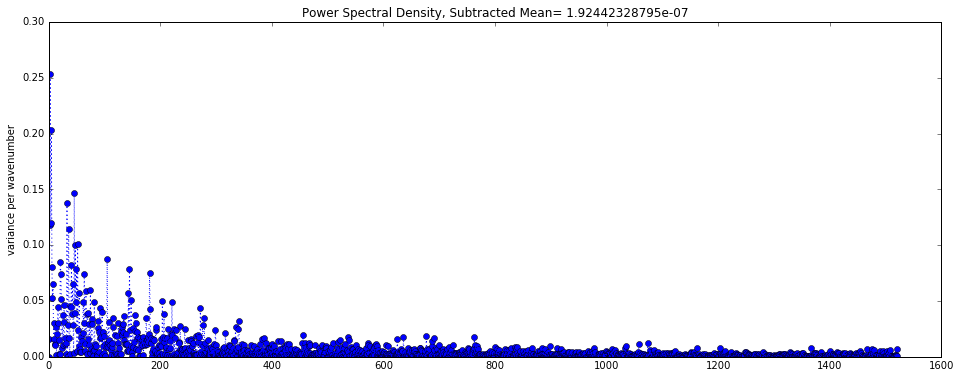

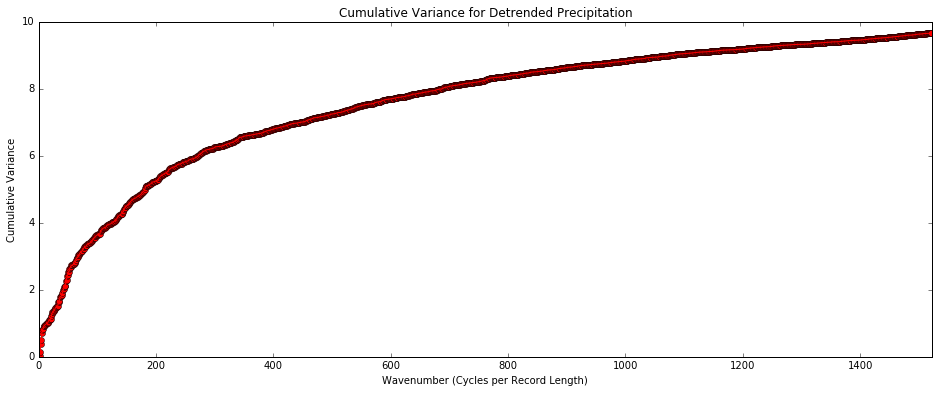

In [10]:
# Power spectral density plot
figure(8, figsize=(16, 6))

plot(Wavenumbers,Power ,'bo')
plot(Wavenumbers,Power ,'b:')

title('Power Spectral Density, Subtracted Mean= '+str(ampli[0]))
ylabel('variance per wavenumber');

# Cumulative power graph
CumWavenum  = concatenate(([-0.5],arange(N/2)+0.5))
CumVar      = concatenate(([0],   cumsum(Power) ))
                     
figure(9, figsize=(16, 6))

plot(CumWavenum,CumVar,'ro')
plot(CumWavenum,CumVar,'r')
xlim([0.5,N/2])
title('Cumulative Variance for Detrended Precipitation')
xlabel('Wavenumber (Cycles per Record Length)')
ylabel('Cumulative Variance');

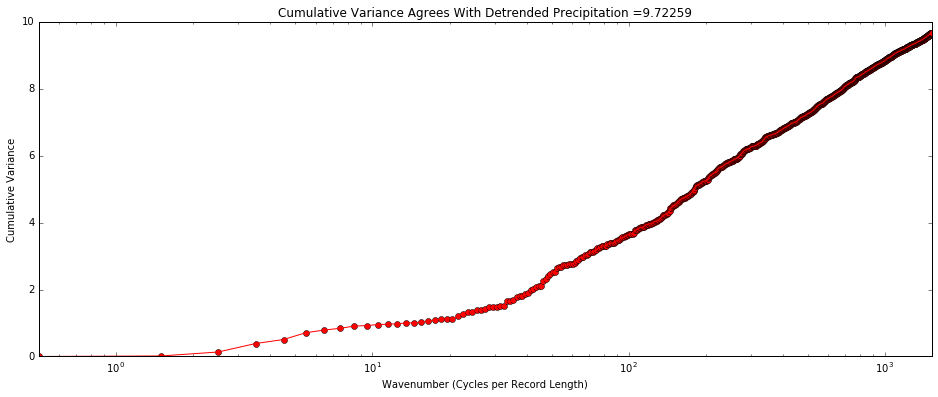

In [11]:
figure(10, figsize=(16, 6))

semilogx(CumWavenum,CumVar,'ro')
semilogx(CumWavenum,CumVar,'r')
xlim([0.5,N/2])
title('Cumulative Variance Agrees With Detrended Precipitation ='+ str(var(Precip_detrend)))
xlabel('Wavenumber (Cycles per Record Length)')
ylabel('Cumulative Variance');

In [12]:
print mean(Precip_detrend**2)
print var(Precip_detrend)

9.72259
9.72259


## Reconstruct (synthesize) data by meddling with phase. 
#### Notice that 1j is *i* in Python 

In [13]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase=0 gives the autocorrelation function
syn_phase = phase*0; explabel = 'phase =0'

# Phase = rand() makes synthetic data
syn_phase = 2*pi*rand( len(phase) ); explabel = 'random phases'

### Build spectrum and invert, from edited amplitude and phase

In [14]:
# Build the synthetic spectrum from real and imaginary parts
syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part

# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()
syn_data = real( ifft(syn_spec)*N )

### Display the synthetic data 

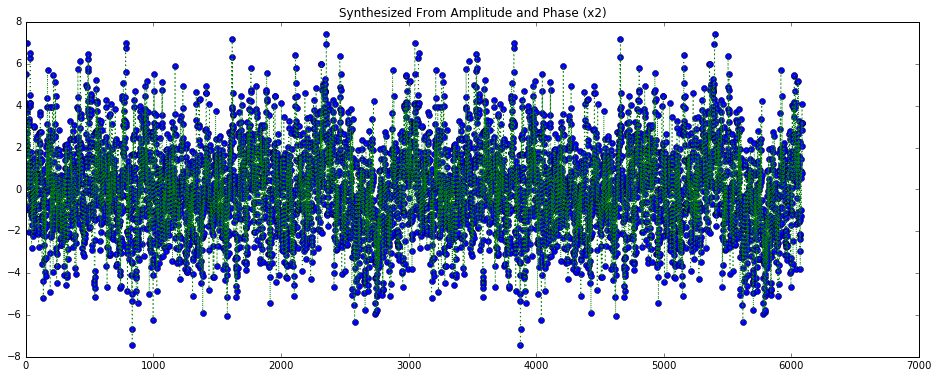

In [15]:
figure(11, figsize=(16, 6))
plot(tile(syn_data,2),'o')
plot(tile(syn_data,2),':')
title('Synthesized From Amplitude and Phase (x2)');

### Display the synthetic data on the raw data (Fig. 1)

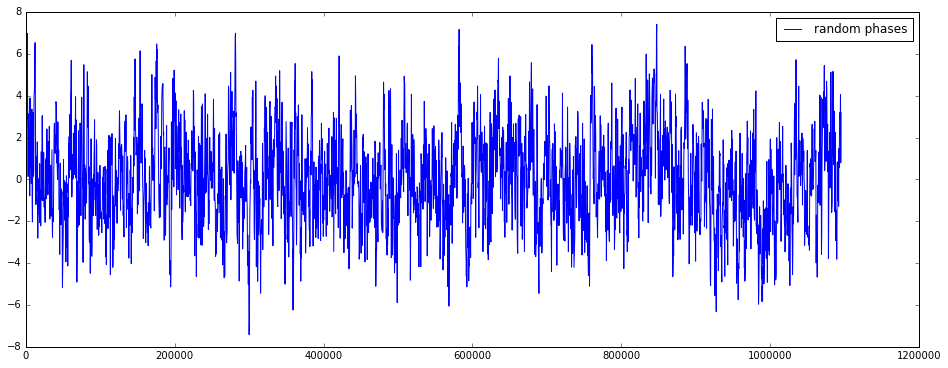

In [16]:
figure(12, figsize=(16, 6)) # replot on top of the initial data plot (Fig. 1)
plot(times,syn_data, label=explabel)
legend(loc='best');

xlabel('')

From your data (what you are trying to mimic), type
corrcoef(y, roll(y,1))
to see the lag-1 value you need. The function roll(y,1) shifts an array y by one slot periodically. (This is careless about endpoint effects; if your series is short, you should be more careful.)

In [17]:
lagvar= var(Precip_detrend) 

print(lagvar)

lag1= corrcoef(Precip_detrend, roll(Precip_detrend,1))

print(lag1)

lenN= len(Precip_detrend)

print(lenN)

9.72259
[[ 1.          0.63354135]
 [ 0.63354135  1.        ]]
3044


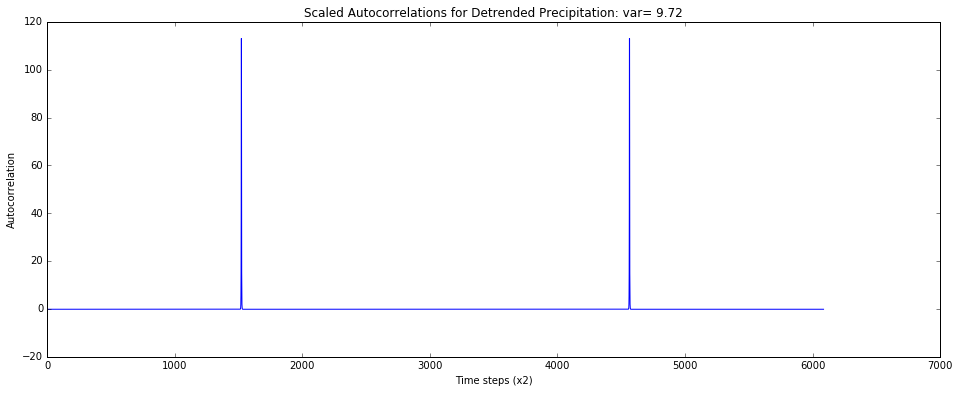

In [18]:
# Let's mimick a data array y, using AR1 red noise. 
# That only depends on autoregression at lag 1 (hence an "AR1 process")

# INPUTS
lag1_autocorr = 0.63354135  # Read off this value from corrcoef(y, roll(y,1))
variance = lagvar        # Read off this value from var(y) 
N = lenN             # Read off this value from len(y)  



### CALCULATIONS AND PLOTTING
T_efold = 1.0/log(lag1_autocorr) # Units: number of array positions

### MAKE A YAUTO(X) ARRAY WITH THE RIGHT SIZE, VARIANCE, AND SPECTRUM
x = arange(N)              # A simple count array
xpert = x-mean(x)  
yauto = exp(- abs(xpert))  # Autocorrelation
# Scale it to have the given variance
yauto *= sqrt(variance/var(yauto))
# Remove the mean
yauto = detrend(yauto) 

### QUICK PLOT TO SEE IF IT IS SENSIBLE

figure(13, figsize=(16, 6))
xx = concatenate([x,x+max(x)])
plot(xx, concatenate([yauto,yauto]))
title('Scaled Autocorrelations for Detrended Precipitation: var='+format(var(yauto),'5.3'));
xlabel('Time steps (x2)')
ylabel('Autocorrelation')

In [19]:
spec = fft.fft(yauto) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

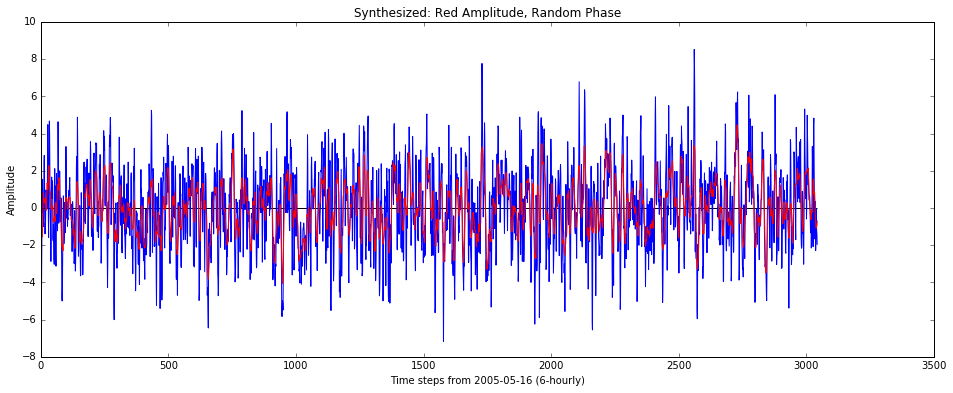

In [23]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase = rand() makes synthetic data
syn_phase = 2*pi*rand( len(phase) )

# Build the synthetic spectrum from real and imaginary parts
# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()

syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part
syn_data = real( ifft(syn_spec)*N )


### PLOT the results
figure(14, figsize=[16,6])
yy = tile(syn_data,2)
# plot(xx,yy)
plot(x, syn_data)

# Overplot a smoothed version
kernel = N/10  # to emphasize lowest frequencies
yysmoo = np.convolve(yy, np.ones((10,))/10, mode='same')
ysmoo = np.convolve(syn_data, np.ones((10,))/10, mode='same')

#plot(xx, yysmoo, 'r', linewidth=3)
plot(x, ysmoo, 'r')

title('Synthesized: Red Amplitude, Random Phase');
hlines(0,min(x),max(x));

xlabel('Time steps from 2005-05-16 (6-hourly)')
ylabel('Amplitude')

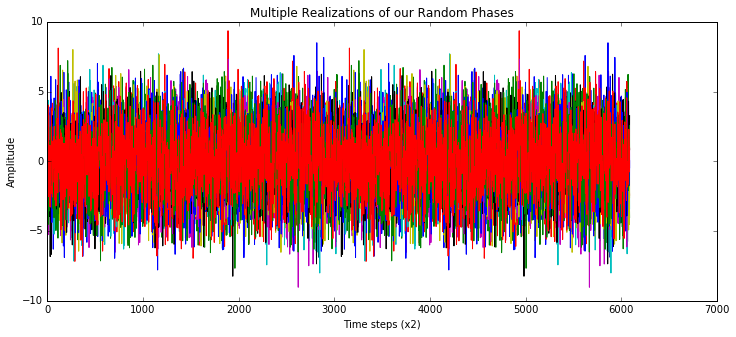

In [21]:
## More realizations with random phases

figure(6, figsize=[12,5])

for i in arange(10): 
    syn_phase = 2*pi*rand( len(phase) )
    
    syn_spec =(    syn_ampli*cos(syn_phase)   #real part
             + 1j* syn_ampli*sin(syn_phase) ) #imag part
    
    syn_data = real( ifft(syn_spec)*N )
    
    plot(tile(syn_data,2),)

title('Multiple Realizations of our Random Phases')
xlabel('Time steps (x2)')
ylabel('Amplitude')